In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
tweets_csv = pd.read_csv("startups/tweets.csv")

In [5]:
tweets_csv.shape

(387847, 8)

In [13]:
tweets_csv[196:200]

,Company,Href,Likes,Name,Retweets,Series,Text,Time
196,Occipital,/naomicostantino,0 likes,Naomi Costantino,0 retweets,_Series_A,releasing the occipital muscles @stefanwarth @...,28 Jun 2011
197,Occipital,/scottbalster,0 likes,Scott Balster,0 retweets,_Series_A,@vikasreddy You're welcome! Completely amazed ...,27 Jun 2011
198,MyEdu,/koalialoalo,0 likes,Victoria,0 retweets,_Series_A,wth? why is myedu so expensive? wasn't pickapr...,13 Dec 2009
199,MyEdu,/myedu_hiroba,0 likes,マイエデュグローバルひろば情報,0 retweets,_Series_A,本日のグローバルキャリア塾終了！Pacific Gatewayのサミー校長はいつものように熱...,11 Dec 2009


In [17]:
from collections import Counter
Counter(tweets_csv.Series)

Counter({'_Series_B': 173305, '_Series_A': 91071, '_Series_C': 90223, '_Series_D': 33135, nan: 113})

In [24]:
int(tweets_csv['Likes'][0].split()[0])

0

In [32]:
tweets_csv[:4].apply(lambda x: len(x), axis=1)

0    8
1    8
2    8
3    8
dtype: int64

In [37]:
tweets_csv[:10].apply(lambda row: int(row[2].split()[0]), axis=1)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

Average tweet length
average tweet per day
proportion of tweets from companies
number of likes/retweets


In [19]:
tweets_csv.ix[196]

Company                                             Occipital
Href                                         /naomicostantino
Likes                                                 0 likes
Name                                         Naomi Costantino
Retweets                                           0 retweets
Series                                              _Series_A
Text        releasing the occipital muscles @stefanwarth @...
Time                                              28 Jun 2011
Name: 196, dtype: object

In [ ]:
def get_num_first(text):
    try:
        

In [41]:
'0 Likes'

NameError: name 'likes' is not defined

In [47]:
int(tweets_csv['Likes'][0].split()[0])

0

In [80]:
def get_num_first(text):
    try:
        return int(text.split()[0])
    except:
        return 0


In [66]:
isinstance('0 Likes', basestring)

True

In [75]:
likes_nan_index = []
for i in xrange(len(tweets_csv['Likes'])):
    if not isinstance(tweets_csv['Likes'][i], basestring):
        #print i
        #print tweets_csv['Likes'][i]
        likes_nan_index.append(i)
        

In [76]:
retweets_nan_index = []
for i in xrange(len(tweets_csv['Likes'])):
    if not isinstance(tweets_csv['Likes'][i], basestring):
        #print i
        #print tweets_csv['Likes'][i]
        retweets_nan_index.append(i)

In [77]:
len(retweets_nan_index)

111

In [101]:
len(retweets)

387847

In [82]:
likes = tweets_csv.apply(lambda row: get_num_first(row[2]), axis=1)
retweets = tweets_csv.apply(lambda row: get_num_first(row[4]), axis=1)

In [93]:
dates = tweets_csv.apply(lambda row: get_date(row[7]), axis=1)

In [90]:
from datetime import datetime
def get_date(text):
    try:
        return datetime.date(datetime.strptime(text, '%d %b %Y'))
    except:
        return 0

In [150]:
tweets_df = pd.DataFrame({    
                  'company_name': tweets_csv['Company'], 
                  'tweeter_href': tweets_csv['Href'],
                  'likes'       : likes,
                  'tweeter_name': tweets_csv['Name'],
                  'retweets'    : retweets,
                  'Series'      : tweets_csv['Series'],
                  'text'        : tweets_csv['Text'],
                  'date'        : dates
             })

In [106]:
tweets_df.groupby()

,Series,company_name,date,likes,retweets,text,tweeter_href,tweeter_name
0,_Series_A,Occipital,2011-07-14,0,0,@rubaums2 mira no frontal até o occipital e f...,/yehyehgluglu,Maria Melo
1,_Series_A,Occipital,2011-07-14,0,1,"Cats out of the bag, we're excited! RT @savvys...",/occipital,Occipital
2,_Series_A,Occipital,2011-07-14,0,0,me duele la cabeza a la altura del occipital -...,/ArturoMisifu,Arturo Quijano
3,_Series_A,Occipital,2011-07-14,0,0,"No matter what happens, I always have the Occi...",/ortidog,Paul White
4,_Series_A,Occipital,2011-07-14,0,0,Headaches are mostly caused by adhesions in th...,/durlancastro,Durlan Castro


In [152]:
tweets_df

,Series,company_name,date,likes,retweets,text,tweeter_href,tweeter_name
0,_Series_A,Occipital,2011-07-14,0,0,@rubaums2 mira no frontal até o occipital e f...,/yehyehgluglu,Maria Melo
1,_Series_A,Occipital,2011-07-14,0,1,"Cats out of the bag, we're excited! RT @savvys...",/occipital,Occipital
2,_Series_A,Occipital,2011-07-14,0,0,me duele la cabeza a la altura del occipital -...,/ArturoMisifu,Arturo Quijano
3,_Series_A,Occipital,2011-07-14,0,0,"No matter what happens, I always have the Occi...",/ortidog,Paul White
4,_Series_A,Occipital,2011-07-14,0,0,Headaches are mostly caused by adhesions in th...,/durlancastro,Durlan Castro
5,_Series_A,Occipital,2011-07-14,0,0,Tripod – Timer for 360 Views – iPhone? : http:...,/victorcab,Victor Caballero
6,_Series_A,Occipital,2011-07-14,0,0,My occipital spatula is orbiting right now. No...,/tash_jade,a.h. sataN
7,_Series_A,Occipital,2011-07-14,0,0,"Neurona, glia,mielina,axon,parietal,occipital,...",/electroniko,MIGUEL NEGRETE
8,_Series_A,Occipital,2011-07-13,0,0,大後頭神経：nervus occipitalis major/greater occipit...,/nomina_bot,体野ミナ
9,_Series_A,Occipital,2011-07-13,0,0,@occipital this means clearcam gets UI fix? id...,/capiendo,Ted Capiendo


In [153]:
tweets_df.groupby(['company_name','Series']).likes.count()

company_name     Series   
140Proof         _Series_B    162
1stdibs          _Series_C    213
2C2P             _Series_A     57
                 _Series_B    113
                 _Series_C    115
2tor             _Series_A     17
                 _Series_B    137
                 _Series_C    162
365DataCenters   _Series_B     95
365Scores        _Series_B    163
36Kr             _Series_C    198
3Drobotics       _Series_A    192
                 _Series_B     56
41stParameter    _Series_D     41
42Floors         _Series_A    107
                 _Series_B    136
4Home            _Series_B      2
                 _Series_C     32
500friends       _Series_A     97
5MinMedia        _Series_B      2
6fusion          _Series_A     98
                 _Series_B    177
6sense           _Series_A    215
                 _Series_B    178
8DWorld          _Series_B      5
8Securities      _Series_A    186
                 _Series_B    139
8thBridge        _Series_A      2
                 _Ser

In [143]:
tweets_df.set_index(['company_name','Series'], inplace=True)
tweets_df['tweet_count'] = tweets_df.groupby(['company_name','Series']).likes.count()

KeyError: 'company_name'

In [138]:
tweets_df.groupby(['company_name','Series']).likes.count()['140Proof']['_Series_B']

162

In [135]:
tweets_df['tweet_count'] = tweets_df.groupby(['company_name','Series']).likes.count()

TypeError: incompatible index of inserted column with frame index

In [139]:
groupby = tweets_df.groupby(['company_name','Series']).likes.count()
tweets_df.apply(lambda row: groupby[row[1]][row[0]])

KeyError: ('_Series_A', u'occurred at index Series')

In [141]:
tweets_df.shape

(370937, 9)

In [142]:
x=0
for row in tweets_df.iterrows():
    x = x+1
print x

370937


In [134]:
name_series_dict = dict(tweets_df.groupby(['company_name','Series']).likes.count())
name_series_count = tweets_df.apply(lambda row: name_series_dict[(row[1], row[0])])
#int(name_series_groupby[[row[1], row[0]]])

KeyError: (('_Series_A', '_Series_A'), u'occurred at index Series')

In [112]:
sum(tweets_df.date == 0)

16903

In [113]:
# drop rows with null values
tweets_df = tweets_df[tweets_df.text.notnull()]
tweets_df = tweets_df[tweets_df.date != 0]

In [118]:
tweets_df['text_length'] = [len(text) for text in tweets_df.text]

In [174]:
temp = tweets_df.groupby(['company_name','Series']).likes.count()

In [133]:
dict(temp)[('Rheonix', '_Series_A')]

12

In [129]:
int(temp[['140Proof', '_Series_B']])

162

In [178]:
mean_groupby = tweets_df.groupby(['company_name','Series']).mean()

In [191]:
count_groupby = tweets_df.groupby(['company_name','Series']).likes.count()

(array([  3.87270000e+05,   3.17000000e+02,   9.30000000e+01,
          3.80000000e+01,   3.20000000e+01,   1.60000000e+01,
          9.00000000e+00,   1.20000000e+01,   8.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

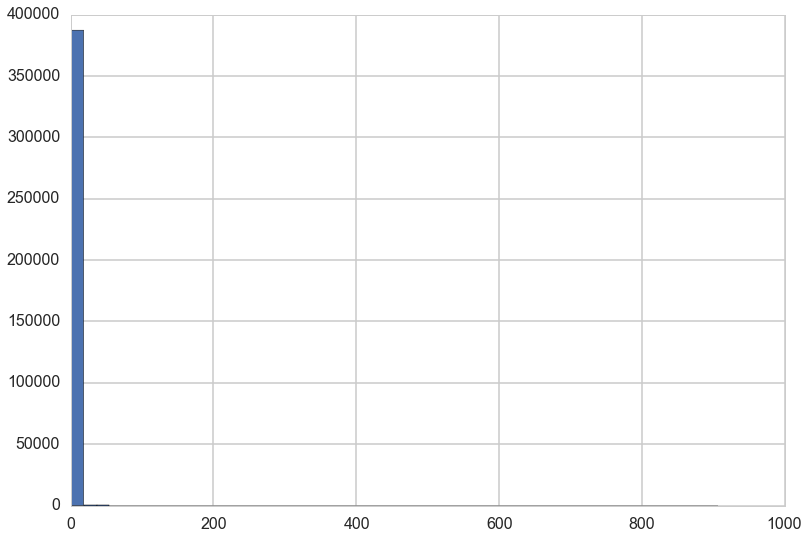

In [188]:
plt.hist(tweets_df['likes'],bins=50)

In [203]:
#count_groupby
len(mean_groupby)

3631

In [210]:
count_groupby = pd.DataFrame(count_groupby)
count_groupby.columns = ['count']

In [215]:
pd.concat([mean_groupby, count_groupby])

count     likes  retweets
company_name    Series                              
140Proof        _Series_B    NaN  0.086420  0.055556
1stdibs         _Series_C    NaN  1.863850  1.521127
2C2P            _Series_A    NaN  0.035088  0.070175
                _Series_B    NaN  0.274336  0.292035
                _Series_C    NaN  0.513043  0.286957
2tor            _Series_A    NaN  0.000000  0.000000
                _Series_B    NaN  0.124088  0.000000
                _Series_C    NaN  0.061728  0.197531
365DataCenters  _Series_B    NaN  0.663158  0.642105
365Scores       _Series_B    NaN  0.092025  0.141104
36Kr            _Series_C    NaN  1.171717  0.343434
3Drobotics      _Series_A    NaN  0.223958  0.406250
                _Series_B    NaN  1.500000  2.000000
41stParameter   _Series_D    NaN  0.000000  0.195122
42Floors        _Series_A    NaN  0.850467  1.514019
                _Series_B    NaN  1.470588  0.926471
4Home           _Series_B    NaN  0.000000  0.000000
                _Series_C    NaN  0.062500  0.000000
500friends      _Series_A    NaN  0.010309  0.175258
5MinMedia       _Series_B    NaN  0.000000  0.000000
6fusion         _Series_A    NaN  0.010204  0.020408
                _Series_B    NaN  0.011299  0.158192
6sense          _Series_A    NaN  0.195349  0.241860
                _Series_B    NaN  0.606742  0.561798
8DWorld         _Series_B    NaN  0.000000  0.000000
8Securities     _Series_A    NaN  0.139785  0.629032
                _Series_B    NaN  0.446043  1.079137
8thBridge       _Series_A    NaN  0.500000  2.500000
                _Series_B    NaN  0.081081  0.432432
908Devices      _Series_B    NaN  0.000000  1.666667
...                          ...       ...       ...
myDocket        _Series_A      2       NaN       NaN
                _Series_B     23       NaN       NaN
myhomemove      _Series_C     13       NaN       NaN
nanoMR          _Series_B      8       NaN       NaN
natera          _Series_A     16       NaN       NaN
                _Series_B    197       NaN       NaN
                _Series_C    213       NaN       NaN
neohapsis       _Series_A     66       NaN       NaN
                _Series_B     66       NaN       NaN
                _Series_C    155       NaN       NaN
oDesk           _Series_C    122       NaN       NaN
                _Series_D    208       NaN       NaN
onefinestay     _Series_A    202       NaN       NaN
                _Series_B    194       NaN       NaN
qinec           _Series_B      4       NaN       NaN
scanR           _Series_B      2       NaN       NaN
sliceX          _Series_B      1       NaN       NaN
thredUP         _Series_B    175       NaN       NaN
                _Series_C    177       NaN       NaN
                _Series_D    196       NaN       NaN
uCirrus         _Series_A      1       NaN       NaN
                _Series_B     13       NaN       NaN
                _Series_C     78       NaN       NaN
uzabase         _Series_C    116       NaN       NaN
vArmourNetworks _Series_A      3       NaN       NaN
                _Series_B      3       NaN       NaN
                _Series_C     17       NaN       NaN
vWise           _Series_C     61       NaN       NaN
                _Series_D    153       NaN       NaN
viagogo         _Series_D     33       NaN       NaN

[7262 rows x 3 columns]

In [211]:
count_groupby

count
company_name    Series          
140Proof        _Series_B    162
1stdibs         _Series_C    213
2C2P            _Series_A     57
                _Series_B    113
                _Series_C    115
2tor            _Series_A     17
                _Series_B    137
                _Series_C    162
365DataCenters  _Series_B     95
365Scores       _Series_B    163
36Kr            _Series_C    198
3Drobotics      _Series_A    192
                _Series_B     56
41stParameter   _Series_D     41
42Floors        _Series_A    107
                _Series_B    136
4Home           _Series_B      2
                _Series_C     32
500friends      _Series_A     97
5MinMedia       _Series_B      2
6fusion         _Series_A     98
                _Series_B    177
6sense          _Series_A    215
                _Series_B    178
8DWorld         _Series_B      5
8Securities     _Series_A    186
                _Series_B    139
8thBridge       _Series_A      2
                _Series_B     37
908Devices      _Series_B      6
...                          ...
myDocket        _Series_A      2
                _Series_B     23
myhomemove      _Series_C     13
nanoMR          _Series_B      8
natera          _Series_A     16
                _Series_B    197
                _Series_C    213
neohapsis       _Series_A     66
                _Series_B     66
                _Series_C    155
oDesk           _Series_C    122
                _Series_D    208
onefinestay     _Series_A    202
                _Series_B    194
qinec           _Series_B      4
scanR           _Series_B      2
sliceX          _Series_B      1
thredUP         _Series_B    175
                _Series_C    177
                _Series_D    196
uCirrus         _Series_A      1
                _Series_B     13
                _Series_C     78
uzabase         _Series_C    116
vArmourNetworks _Series_A      3
                _Series_B      3
                _Series_C     17
vWise           _Series_C     61
                _Series_D    153
viagogo         _Series_D     33

[3631 rows x 1 columns]

In [195]:
mean_groupby

likes  retweets
company_name    Series                       
140Proof        _Series_B  0.086420  0.055556
1stdibs         _Series_C  1.863850  1.521127
2C2P            _Series_A  0.035088  0.070175
                _Series_B  0.274336  0.292035
                _Series_C  0.513043  0.286957
2tor            _Series_A  0.000000  0.000000
                _Series_B  0.124088  0.000000
                _Series_C  0.061728  0.197531
365DataCenters  _Series_B  0.663158  0.642105
365Scores       _Series_B  0.092025  0.141104
36Kr            _Series_C  1.171717  0.343434
3Drobotics      _Series_A  0.223958  0.406250
                _Series_B  1.500000  2.000000
41stParameter   _Series_D  0.000000  0.195122
42Floors        _Series_A  0.850467  1.514019
                _Series_B  1.470588  0.926471
4Home           _Series_B  0.000000  0.000000
                _Series_C  0.062500  0.000000
500friends      _Series_A  0.010309  0.175258
5MinMedia       _Series_B  0.000000  0.000000
6fusion         _Series_A  0.010204  0.020408
                _Series_B  0.011299  0.158192
6sense          _Series_A  0.195349  0.241860
                _Series_B  0.606742  0.561798
8DWorld         _Series_B  0.000000  0.000000
8Securities     _Series_A  0.139785  0.629032
                _Series_B  0.446043  1.079137
8thBridge       _Series_A  0.500000  2.500000
                _Series_B  0.081081  0.432432
908Devices      _Series_B  0.000000  1.666667
...                             ...       ...
myDocket        _Series_A  0.000000  0.000000
                _Series_B  1.347826  1.000000
myhomemove      _Series_C  0.000000  0.076923
nanoMR          _Series_B  0.000000  0.000000
natera          _Series_A  0.000000  0.000000
                _Series_B  0.020305  0.025381
                _Series_C  0.004695  0.061033
neohapsis       _Series_A  0.075758  0.030303
                _Series_B  0.075758  0.030303
                _Series_C  0.135484  0.341935
oDesk           _Series_C  0.000000  0.000000
                _Series_D  0.009615  0.038462
onefinestay     _Series_A  0.069307  0.207921
                _Series_B  0.123711  0.541237
qinec           _Series_B  0.000000  0.000000
scanR           _Series_B  0.000000  0.000000
sliceX          _Series_B  0.000000  0.000000
thredUP         _Series_B  0.165714  0.308571
                _Series_C  0.062147  0.141243
                _Series_D  0.270408  0.163265
uCirrus         _Series_A  0.000000  0.000000
                _Series_B  0.307692  0.000000
                _Series_C  0.102564  0.192308
uzabase         _Series_C  0.715517  0.568966
vArmourNetworks _Series_A  0.000000  0.333333
                _Series_B  0.000000  0.333333
                _Series_C  0.529412  0.705882
vWise           _Series_C  0.065574  0.114754
                _Series_D  0.385621  0.457516
viagogo         _Series_D  0.000000  0.000000

[3631 rows x 2 columns]

In [202]:
len(pd.concat([mean_groupby, count_groupby])[0])

7262

In [200]:
pd.concat([mean_groupby, count_groupby])[0].isnull()

company_name     Series   
140Proof         _Series_B     True
1stdibs          _Series_C     True
2C2P             _Series_A     True
                 _Series_B     True
                 _Series_C     True
2tor             _Series_A     True
                 _Series_B     True
                 _Series_C     True
365DataCenters   _Series_B     True
365Scores        _Series_B     True
36Kr             _Series_C     True
3Drobotics       _Series_A     True
                 _Series_B     True
41stParameter    _Series_D     True
42Floors         _Series_A     True
                 _Series_B     True
4Home            _Series_B     True
                 _Series_C     True
500friends       _Series_A     True
5MinMedia        _Series_B     True
6fusion          _Series_A     True
                 _Series_B     True
6sense           _Series_A     True
                 _Series_B     True
8DWorld          _Series_B     True
8Securities      _Series_A     True
                 _Series_B     True
8

In [179]:
mean_groupby

likes  retweets
company_name    Series                       
140Proof        _Series_B  0.086420  0.055556
1stdibs         _Series_C  1.863850  1.521127
2C2P            _Series_A  0.035088  0.070175
                _Series_B  0.274336  0.292035
                _Series_C  0.513043  0.286957
2tor            _Series_A  0.000000  0.000000
                _Series_B  0.124088  0.000000
                _Series_C  0.061728  0.197531
365DataCenters  _Series_B  0.663158  0.642105
365Scores       _Series_B  0.092025  0.141104
36Kr            _Series_C  1.171717  0.343434
3Drobotics      _Series_A  0.223958  0.406250
                _Series_B  1.500000  2.000000
41stParameter   _Series_D  0.000000  0.195122
42Floors        _Series_A  0.850467  1.514019
                _Series_B  1.470588  0.926471
4Home           _Series_B  0.000000  0.000000
                _Series_C  0.062500  0.000000
500friends      _Series_A  0.010309  0.175258
5MinMedia       _Series_B  0.000000  0.000000
6fusion         _Series_A  0.010204  0.020408
                _Series_B  0.011299  0.158192
6sense          _Series_A  0.195349  0.241860
                _Series_B  0.606742  0.561798
8DWorld         _Series_B  0.000000  0.000000
8Securities     _Series_A  0.139785  0.629032
                _Series_B  0.446043  1.079137
8thBridge       _Series_A  0.500000  2.500000
                _Series_B  0.081081  0.432432
908Devices      _Series_B  0.000000  1.666667
...                             ...       ...
myDocket        _Series_A  0.000000  0.000000
                _Series_B  1.347826  1.000000
myhomemove      _Series_C  0.000000  0.076923
nanoMR          _Series_B  0.000000  0.000000
natera          _Series_A  0.000000  0.000000
                _Series_B  0.020305  0.025381
                _Series_C  0.004695  0.061033
neohapsis       _Series_A  0.075758  0.030303
                _Series_B  0.075758  0.030303
                _Series_C  0.135484  0.341935
oDesk           _Series_C  0.000000  0.000000
                _Series_D  0.009615  0.038462
onefinestay     _Series_A  0.069307  0.207921
                _Series_B  0.123711  0.541237
qinec           _Series_B  0.000000  0.000000
scanR           _Series_B  0.000000  0.000000
sliceX          _Series_B  0.000000  0.000000
thredUP         _Series_B  0.165714  0.308571
                _Series_C  0.062147  0.141243
                _Series_D  0.270408  0.163265
uCirrus         _Series_A  0.000000  0.000000
                _Series_B  0.307692  0.000000
                _Series_C  0.102564  0.192308
uzabase         _Series_C  0.715517  0.568966
vArmourNetworks _Series_A  0.000000  0.333333
                _Series_B  0.000000  0.333333
                _Series_C  0.529412  0.705882
vWise           _Series_C  0.065574  0.114754
                _Series_D  0.385621  0.457516
viagogo         _Series_D  0.000000  0.000000

[3631 rows x 2 columns]

In [172]:
temp['likes']['140Proof']['_Series_B']

0.086419753086419748

company_name     Series   
140Proof         _Series_B    162
1stdibs          _Series_C    213
2C2P             _Series_A     57
                 _Series_B    113
                 _Series_C    115
2tor             _Series_A     17
                 _Series_B    137
                 _Series_C    162
365DataCenters   _Series_B     95
365Scores        _Series_B    163
36Kr             _Series_C    198
3Drobotics       _Series_A    192
                 _Series_B     56
41stParameter    _Series_D     41
42Floors         _Series_A    107
                 _Series_B    136
4Home            _Series_B      2
                 _Series_C     32
500friends       _Series_A     97
5MinMedia        _Series_B      2
6fusion          _Series_A     98
                 _Series_B    177
6sense           _Series_A    215
                 _Series_B    178
8DWorld          _Series_B      5
8Securities      _Series_A    186
                 _Series_B    139
8thBridge        _Series_A      2
                 _Ser

In [180]:
count = tweets_df.groupby(['company_name','Series']).count()['date']

In [154]:
funding_csv = pd.read_csv('startups/funding.csv')

In [155]:
funding_csv.head()

,Description,Market,Names,No_Stage_Amount,No_Stage_Date,Pitch,Seed_Amount,Seed_Date,Series_A_Amount,Series_A_Date,Series_B_Amount,Series_B_Date,Series_C_Amount,Series_C_Date,Series_D_Amount,Series_D_Date,Stage
0,NaN,Cable,Epic-Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$13,000,000","Nov 13, 2012","$30,000,000","Jul 30, 2014",NaN,NaN,Series C
1,NaN,All Students,Apreso-Classroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$15,000,000","Oct 14, 2008",NaN,NaN,NaN,NaN,Series B
2,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,NaN,NaN,Effective and Secure Offline to Mobile experie...,"$750,000","Mar 25, 2012","$1,600,000","Aug 15, 2013",Unknown,"Jan 20, 2015",NaN,NaN,NaN,NaN,Series B
3,NaN,Food Processing,Onshift,"$7,000,000","Feb 3, 2014",NaN,NaN,NaN,NaN,NaN,"$3,000,000","Feb 2, 2012",NaN,NaN,NaN,NaN,Series C
4,NaN,-,Xendex-Holding,NaN,NaN,NaN,NaN,NaN,Unknown,"Jun 25, 2008","$3,500,000","Nov 30, 2009",NaN,NaN,NaN,NaN,Series A


In [166]:
Counter(funding_csv['Market'])

Counter({nan: 306, 'Biotechnology': 284, 'Software': 235, '-': 191, 'Health Care': 104, 'Enterprise Software': 97, 'Clean Technology': 80, 'Hardware + Software': 76, 'Semiconductors': 74, 'Mobile': 58, 'Curated Web': 58, 'Web Hosting': 47, 'Security': 45, 'Advertising': 42, 'E-Commerce': 41, 'Games': 36, 'Finance': 34, 'Analytics': 32, 'SaaS': 26, 'Manufacturing': 26, 'Health and Wellness': 22, 'Technology': 20, 'Big Data Analytics': 20, 'Education': 19, 'Consulting': 16, 'Messaging': 15, 'Hospitality': 15, 'Marketplaces': 13, 'Networking': 13, 'Social Media': 13, 'Virtualization': 13, 'B2B': 12, 'Web Development': 12, 'Crowdsourcing': 11, 'Cloud Data Services': 11, 'Video': 11, 'Big Data': 11, 'Medical Devices': 11, 'Real Estate': 10, 'Databases': 10, 'Fashion': 10, 'Online Video Advertising': 9, 'Public Relations': 9, 'Apps': 9, 'Mobile Advertising': 9, 'Wireless': 9, 'Mobile Payments': 8, 'Advertising Platforms': 8, 'Open Source': 8, 'Small and Medium Businesses': 8, 'Android': 8, '

(array([ 398.,   29.,    4.,    3.,    2.,    3.,    2.,    2.,    0.,
           2.,    0.,    1.,    2.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.]),
 array([   1. ,    7.1,   13.2,   19.3,   25.4,   31.5,   37.6,   43.7,
          49.8,   55.9,   62. ,   68.1,   74.2,   80.3,   86.4,   92.5,
          98.6,  104.7,  110.8,  116.9,  123. ,  129.1,  135.2,  141.3,
         147.4,  153.5,  159.6,  165.7,  171.8,  177.9,  184. ,  190.1,
         196.2,  202.3,  208.4,  214.5,  220.6,  226.7,  232.8,  238.9,
         245. ,  251.1,  257.2,  263.3,  269.4,  275.5,  281.6,  287.7,
         293.8,  299.9,  306. ]),
 <a list of 50 Patch objects>)

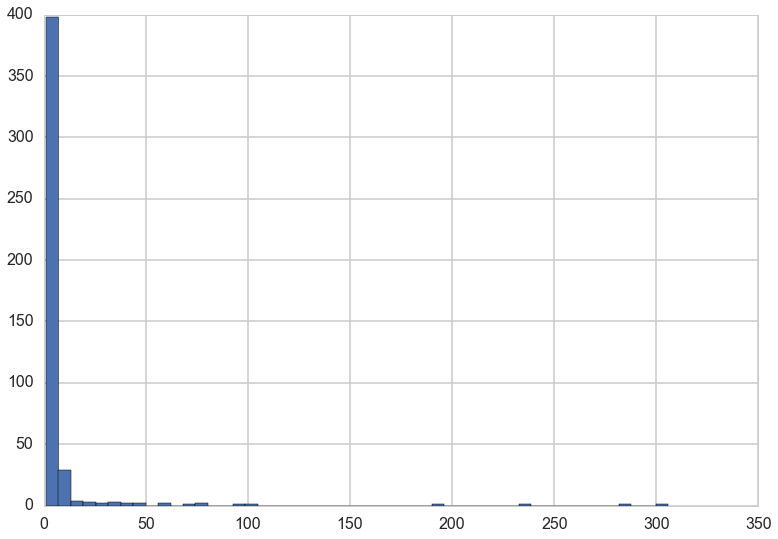

In [165]:
plt.hist(Counter(funding_csv['Market']).values(),bins=50)